In [1]:
#Imports

import profile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
# Rename Column names
heart.rename(columns={'cp': 'chest_pain_type', 'trestbps':'resting_bp', 'chol':'serum_chol','fbs':'fasting_blood_sugar',\
    'restecg':'resting_elec_cardio_results','thalach':'maximum_hr','exang':'ex_induces_angina','ca':'num_visible_vessels',\
        'thal':'defect_type'}, inplace=True)

# EDA

<AxesSubplot:>

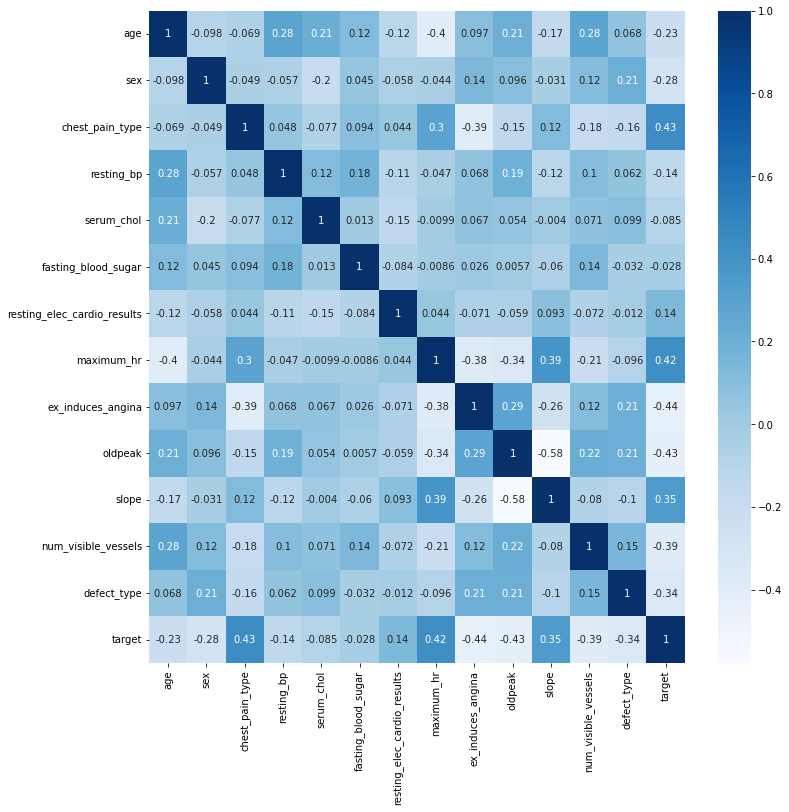

In [4]:
# Plotting correlation to see how columns relate to target variable

plt.figure(figsize=(12,12))
sns.heatmap(heart.corr(), cmap='Blues', annot=True)

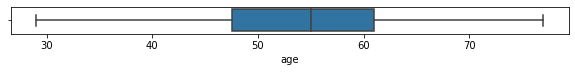

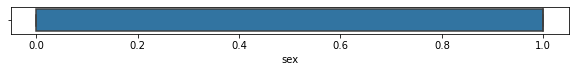

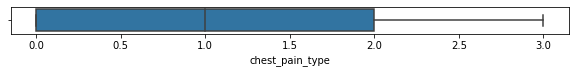

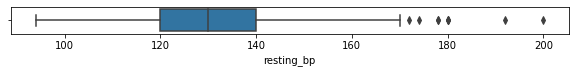

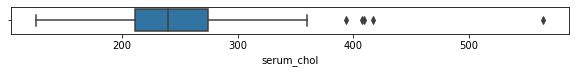

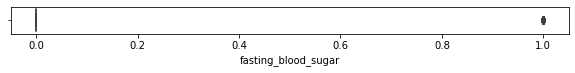

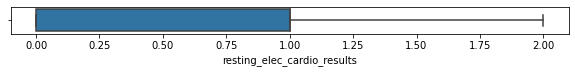

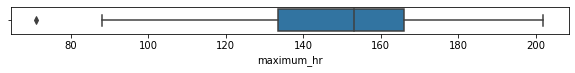

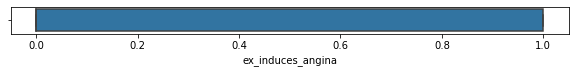

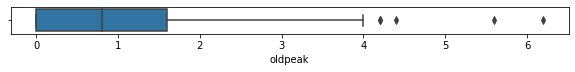

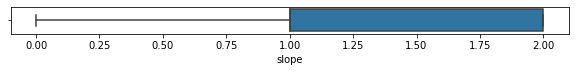

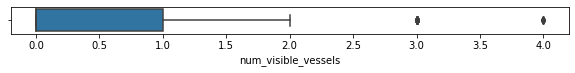

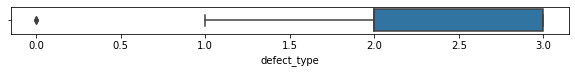

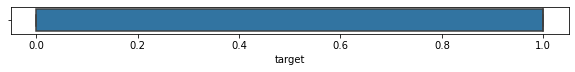

In [5]:
#Plot boxplots to see if there are outliers and what they look like
for column in heart:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(data=heart, x=column)

# Implementing the Random Forest Algorithm

In [6]:
#Set our x and y variables. We want the target column to be our dependent variable (chance of heart attack)
x= heart.drop(columns='target')
y= heart['target']

In [7]:
#Split the dataset into 80% train and 20% test

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [8]:
# Run the random forest model
# Start with 20 trees
r_forest_model = RandomForestClassifier()

#train the model using the training sets
r_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Predict on the test sets
predicted_outcome = r_forest_model.predict(X_test)

In [10]:
# Calculate Model Accuracy
model_accuracy = accuracy_score(y_test, predicted_outcome)
print(model_accuracy)

0.8524590163934426


In [11]:
#Calculate Mathews Correlation Coefficient
matthews_corrcoef(y_test,predicted_outcome)

0.7002255239802613

In [12]:
# AUC score
auc = metrics.roc_auc_score(y_test,predicted_outcome)

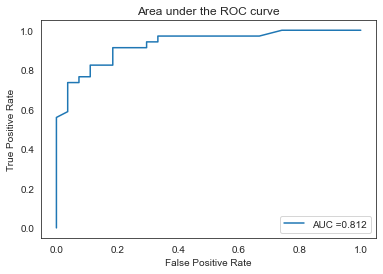

In [62]:
y_pred_proba = r_forest_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label = 'AUC =' + str(0.812))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Area under the ROC curve')

plt.savefig('First_run_AUC')

c:\Users\edsta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


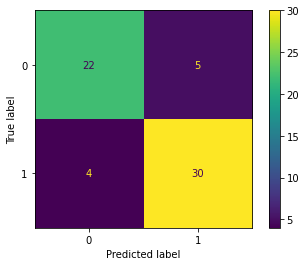

In [14]:
# Create a confusion matrix
plot_confusion_matrix(r_forest_model,X_test,y_test)
plt.show()


In [15]:
# See the importance of features
feature_importance_df = pd.DataFrame(
    {'Column': list(x.columns), 'Importance': r_forest_model.feature_importances_}
).sort_values('Importance', ascending=False)

feature_importance_df

,Column,Importance
11,num_visible_vessels,0.131405
7,maximum_hr,0.131321
2,chest_pain_type,0.123719
9,oldpeak,0.108387
12,defect_type,0.100061
0,age,0.083360
4,serum_chol,0.080206
3,resting_bp,0.074536
1,sex,0.051170
8,ex_induces_angina,0.042693


<Figure size 720x1440 with 0 Axes>

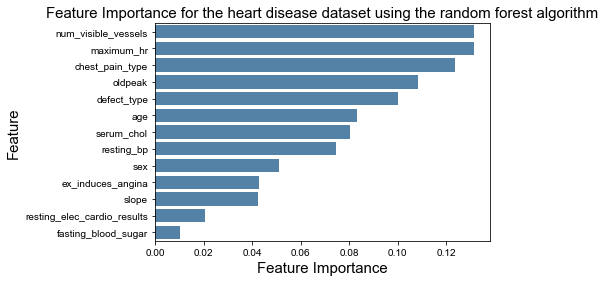

<Figure size 720x1440 with 0 Axes>

In [16]:
# Plot the features importance
sns.barplot(data=feature_importance_df, y='Column', x='Importance', color='steelblue')
sns.set_style('white')
plt.xlabel('Feature Importance', size=15)
plt.ylabel('Feature', size=15)
plt.title('Feature Importance for the heart disease dataset using the random forest algorithm', size = 15)
plt.figure(figsize=(10,20))



# Trying to Improve the Model

### Remove fasting_blood_sugar since it has a low importance value



In [17]:
#Set our x and y variables

x_with_dropped_features = heart.drop(columns=['target','fasting_blood_sugar'])
y_with_dropped_features = heart['target']

In [18]:
#Split the dataset into 80% train and 20% test

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_with_dropped_features, y_with_dropped_features,\
     test_size=0.20, random_state=0)
     

In [19]:
# Run the random forest model
# Start with 100 trees

r_forest_model_with_dropped_features = RandomForestClassifier()

#train the model using the training sets
r_forest_model_with_dropped_features.fit(X_train_2, y_train_2)

RandomForestClassifier()

In [20]:
# Predict on the test sets
predicted_outcome_2 = r_forest_model_with_dropped_features.predict(X_test_2)

In [21]:
# Calculate Model Accuracy
model_accuracy_2 = accuracy_score(y_test_2, predicted_outcome_2)
print(model_accuracy_2)

0.8360655737704918


In [22]:
#Calculate Mathews Correlation Coefficient
matthews_corrcoef(y_test_2,predicted_outcome_2)

0.6677559912854031

In [23]:
# AUC score
metrics.roc_auc_score(y_test_2,predicted_outcome_2)

0.8338779956427016

### Use 150  trees


In [24]:
x_more_trees = heart.drop(columns=['target'])
y_more_trees = heart['target']

In [25]:
#Split the dataset into 80% train and 20% test

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x_more_trees, y_more_trees,test_size=0.20, random_state=0)
     

In [26]:
# Run the random forest model
# Run with 150 trees

r_forest_model_more_trees = RandomForestClassifier(n_estimators=150)

#train the model using the training sets
r_forest_model_more_trees.fit(X_train_3, y_train_3)

RandomForestClassifier(n_estimators=150)

In [27]:
# Predict on the test sets
predicted_outcome_3 = r_forest_model_more_trees.predict(X_test_3)

In [28]:
# Calculate Model Accuracy
model_accuracy_3 = accuracy_score(y_test_3, predicted_outcome_3)
print(model_accuracy_3)

0.8688524590163934


In [29]:
#Calculate Mathews Correlation Coefficient
matthews_corrcoef(y_test_3,predicted_outcome_3)

0.7342047930283224

In [30]:
# AUC score
metrics.roc_auc_score(y_test_3,predicted_outcome_3)

0.8671023965141612

### Hyperparameter Tuning

In [31]:
x= heart.drop(columns='target')
y= heart['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


# Create a list for number of trees between 20 and 300 and going up by 5
trees = []
for i in range(10,360,50):
    trees.append(i)

# Specify the parameters to test
param_grid = {
    'n_estimators': trees,
    'max_features': ['sqrt','log2',None]
}

# Create a model

rf = RandomForestClassifier()

#Use grid search

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid)

# fit the grid search to the data

grid_search.fit(X_train, y_train)




GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 60, 110, 160, 210, 260, 310]})

In [32]:
# See what the best number of trees and max_features were
grid_search.best_params_


{'max_features': 'log2', 'n_estimators': 60}

### The model would run most accurately with 260 trees and using sqrt
### Let's run it with those parameters

In [59]:
x_= heart.drop(columns=['target','fasting_blood_sugar'])
y_= heart['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

rf = RandomForestClassifier(n_estimators=260, max_features='sqrt')

#train the model using the training sets
rf.fit(X_train, y_train)
# Predict on the test sets
pred = rf.predict(X_test)

In [60]:
# Calculate Model Accuracy
model_accuracy_245 = accuracy_score(y_test, pred)
print(f'Model Accuracy: {model_accuracy_245}')
#Calculate Mathews Correlation Coefficient
mc = matthews_corrcoef(y_test,pred)
print(f'Mathews Corref{mc}')

#AUC
auc = metrics.roc_auc_score(y_test,pred)
print(f' AUC: {auc}')


#Score improved!

Model Accuracy: 0.8852459016393442
Mathews Corref0.7686553370045232
 AUC: 0.8779956427015251


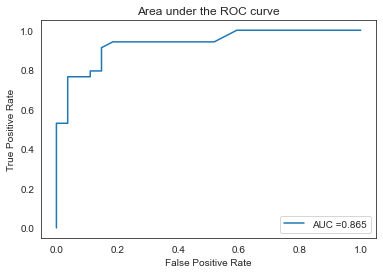

In [61]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label = 'AUC =' + str(0.865))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Area under the ROC curve')

plt.savefig('Tuned_run_AUC')

# Implementing the K nearest neighbors to compare to our model

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Using the default setting
knn_model = KNeighborsClassifier()

In [37]:
x_knn = heart.drop(columns=['target'])
y_knn = heart['target']

In [38]:
#Split data into the training and testing
x_train, x_test, y_train, y_test = train_test_split(x_knn, y_knn, test_size=0.20, random_state=0)

In [39]:
#train the model using the training sets
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
# Predict on the test sets
knn_predicted_outcome = knn_model.predict(x_test)

In [41]:
# Calculate Model Accuracy
knn_model_accuracy = accuracy_score(y_test, knn_predicted_outcome)
print(knn_model_accuracy)

0.639344262295082


### Model performed way worse compared to the random trees

In [42]:
#Calculate matthews corrcoef
matthews_corrcoef(y_test,knn_predicted_outcome)

0.27519363696469856

### Horrible mathews correlation coefficient

In [43]:
# AUC score
metrics.roc_auc_score(y_test,knn_predicted_outcome)

0.6383442265795207

c:\Users\edsta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


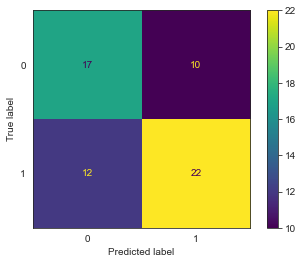

In [44]:
# Create a confusion matrix
plot_confusion_matrix(knn_model,X_test,y_test)
plt.show()
